<a href="https://colab.research.google.com/github/Mya-Miller/MachineLearningProject/blob/main/EMNIST_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
train_ds = pd.read_csv('emnist-letters-train.csv')
test_ds = pd.read_csv('emnist-letters-test.csv')

In [3]:
X = train_ds.drop(['23'], axis=1)
y = train_ds['23']

In [4]:
X_test = test_ds.drop(['1'], axis=1)
y_test = test_ds['1']

In [5]:
X.shape

(88799, 784)

In [6]:
y.shape

(88799,)

In [7]:
X_test.shape

(14799, 784)

In [8]:
y_test.shape

(14799,)

<function matplotlib.pyplot.show(close=None, block=None)>

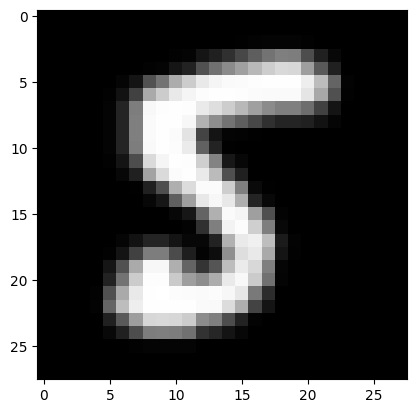

In [9]:
pos = 17
first_image = X.iloc[pos].to_numpy()
pixels = first_image.reshape((28,28))
image = np.fliplr(pixels)
image = np.rot90(image)
plt.imshow(image, cmap='gray')
plt.show


In [10]:
# Flatten the images
X = X / 255.0  # Normalize pixel values to be in the range [0, 1]
X = X.values.reshape(X.shape[0], 28*28)
X_test = X_test / 255.0  # Normalize pixel values for the test set
X_test = X_test.values.reshape(X_test.shape[0], 28*28)

In [11]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

SVC(kernel='linear')

In [12]:
y_pred_test = svm_model.predict(X_test)
accuracy_val = accuracy_score(y_test, y_pred_test)
print(f'Validation Accuracy: {accuracy_val}')

Validation Accuracy: 0.771065612541388


In [13]:
import joblib

model_filename = 'emnist_svm.pkl'  # Choose a filename
joblib.dump(svm_model, model_filename)

print(f"Model saved as {model_filename}")

Model saved as emnist_svm.pkl


In [14]:
import cv2  # OpenCV for image processing
import numpy as np
from sklearn.svm import SVC
import joblib

In [15]:
# Load the trained SVM model
sv_model = joblib.load('emnist_svm.pkl')

In [16]:
# Load and preprocess the custom image
custom_image = cv2.imread('tst.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
custom_image = cv2.resize(custom_image, (28, 28))  # Resize to match your model's input size
custom_image = custom_image.astype('float32') / 255.0

In [17]:
# Flatten the image (if needed)
custom_image = custom_image.reshape(1, -1)

In [33]:
# Make predictions
predicted_label = sv_model.predict(custom_image)
print(f"Predicted label: {predicted_label}")
predicted_label = predicted_label[0]

Predicted label: [17]


In [34]:
# Retrieve the character associated with the predicted class from your class mapping
class_mapping = ' ABCDEFGHIJKLMNOPQRSTUVWXYZ'  # You should use your actual class mapping

In [35]:
predicted_character = class_mapping[predicted_label]

# Visualize the test image and the predicted character
first_image = X_test.iloc[pos].to_numpy()
pixels = first_image.reshape((28, 28))
image = np.fliplr(pixels)
image = np.rot90(image)

# Visualize the custom image and the predicted character
pixels = custom_image.reshape((28, 28))
image = np.fliplr(pixels)
image = np.rot90(image)
plt.imshow(image, cmap='gray')
plt.title(f'Predicted: {predicted_character}')
plt.show()

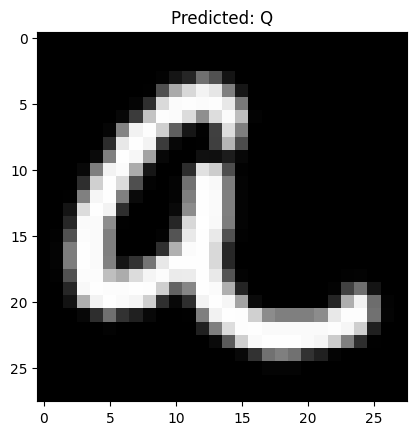

In [36]:
plt.imshow(image, cmap='gray')
plt.title(f'Predicted: {predicted_character}')
plt.show()

In [19]:
svm_model = SVC(kernel='linear')

In [20]:
# Define the number of epochs or iterations
num_epochs = 10  # You can adjust this number

In [ ]:
from tqdm import tqdm
import time

# Wrap the training loop with tqdm
for epoch in tqdm(range(num_epochs), desc="SVM Training"):
    # Fit the SVM model
    svm_model.fit(X, y)

SVM Training:   0%|          | 0/10 [00:00<?, ?it/s]